In [6]:
import pandas as pd
import numpy as np

# Load your cleaned dataset
df= pd.read_csv("/Users/applebuy/clean_df2.csv")
# sample_fraction = 0.1  # Adjust this fraction as needed
# data_sample = df.sample(frac=sample_fraction, random_state=42)
data = df.select_dtypes(include=[np.number])
data.describe()
feature_name = "total_amount"

# Define the number of bins (equal to the number of categories)
num_bins = 3

# Discretize the total amount into three categories based on equal frequency binning
data['total_amount_category'] = pd.qcut(data[feature_name], q=num_bins, labels=['high', 'mid', 'low'], duplicates='drop')

# Check the distribution of the categories
print(data['total_amount_category'].value_counts())

total_amount_category
high    279120
low     257018
mid     254667
Name: count, dtype: int64


Test Accuracy: 0.9362896036317423
Classification Report on Test Set:
              precision    recall  f1-score   support

        high       0.92      0.98      0.95    111648
         low       1.00      0.92      0.95    102807
         mid       0.90      0.91      0.90    101867

    accuracy                           0.94    316322
   macro avg       0.94      0.93      0.94    316322
weighted avg       0.94      0.94      0.94    316322

Confusion Matrix on Test Set:
[[109429     16   2203]
 [   347  94153   8307]
 [  8904    376  92587]]


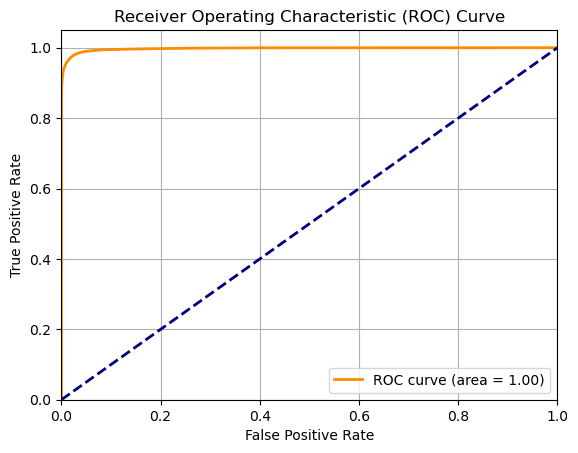

[learning_curve] Training set sizes: [ 37958  75917 113875 151834 189793 227751 265710 303668 341627 379586]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming df is your DataFrame containing the data
# Assuming 'total_amount_category' is your target variable and the rest are features
X = data.drop(columns=['total_amount', 'total_amount_category'])
y = data['total_amount_category']

# Split the data into training (60%) and test (40%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
d
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Define the KNN model with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=688, metric='manhattan')

# Train the model on the training set
best_knn.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_test_pred = best_knn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print(f"Classification Report on Test Set:\n{classification_report(y_test, y_test_pred)}")

# Compute and print the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix on Test Set:")
print(conf_matrix_test)

# Plotting the ROC curve
y_test_proba = best_knn.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:, 1], pos_label=best_knn.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_knn, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), verbose=1)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.grid()
plt.show()

#KNN k-fold
-summary:Test Accuracy: 0.9362896036317423. This means that the model correctly predicts the category of the total_amount approximately 93.63% of the time on the test set.

Graph: 
The ROC Curve shows that the model has excellent discriminatory power with an AUC of 1.00.
The Learning Curve helps understand the model's performance and whether adding more data could improve the model or if it is suffering from high bias or variance.
learning curve:

-The red line represents the training score.
-The green line represents the cross-validation score.
-The learning curve indicates how the model's performance improves with the increasing size of the training set. The gap between the training and cross-validation scores can provide insights into potential overfitting (large gap) or underfitting (small gap).

-knn vs knn-fold:
 **k-NN Model**: Shows perfect performance on the test set, suggesting potential overfitting with accuracy 99%. The model may not generalize well to new, unseen data.
- **fold k-NN Model**: Shows realistic high performance with an accuracy of 93.63% and good classification metrics. The inclusion of the ROC curve and learning curve provides insights into model performance and generalizability, with a high AUC indicating good model performance.


#KNN results
-Graph:
The training error increases with K due to increased model bias.
The validation error decreases initially and then increases, indicating the optimal K value where the model balances bias and variance.

-summary:
The model with K=1 provides the best validation performance.
The test set evaluation shows near-perfect accuracy, precision, recall, and F1-scores, suggesting the model fits the data exceptionally well.
The confusion matrix confirms the high accuracy, with most predictions being correct.


1
2
hiiii
5
6
0.0030327902908522386
5
6
0.0038904997973483457
5
6
0.0030426492917268178
5
6
0.003263238306606908
5
6
0.0032151770460352447
5
6
0.0034111193560250053
5
6
0.0033482700421458844
5
6
0.0035737885802429314
5
6
0.0035959705614911908
5
6
0.003704416442673386


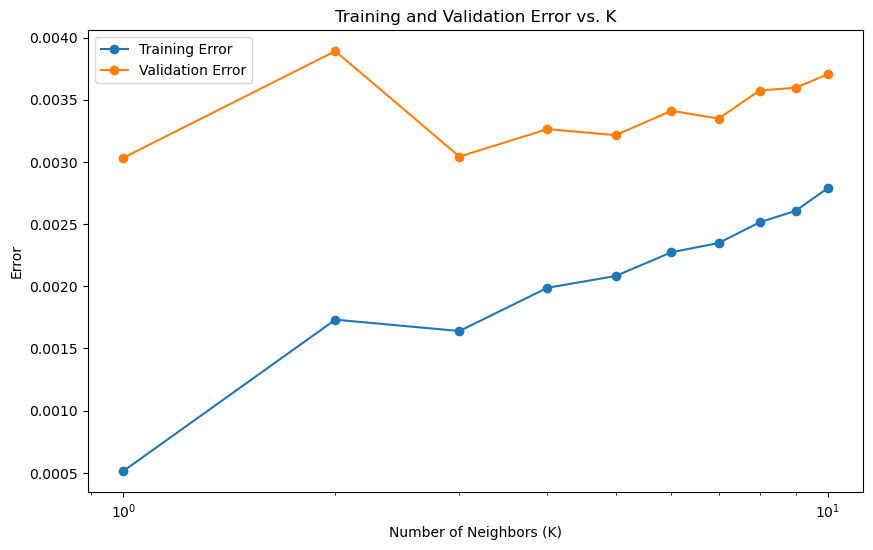

Best K value: 1
Accuracy on test set: 0.9972395571460965
Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00     67629
         low       1.00      1.00      1.00     67515
         mid       1.00      1.00      1.00     67722

    accuracy                           1.00    202866
   macro avg       1.00      1.00      1.00    202866
weighted avg       1.00      1.00      1.00    202866

Confusion Matrix:
[[67553    11    65]
 [    8 67285   222]
 [   72   182 67468]]


In [9]:
# Train you model using Training data for
# several values of K
# • Calculate 𝐸𝑟𝑟𝑜𝑟𝐶𝑉 for every K, and
# repeat that several times to have a
# confidence interval
# • Choose the one that yields least error
# • Calculate the final 𝐸𝑟𝑟𝑜𝑟𝑇𝑒𝑠𝑡 using Test Data
#The results you presented show a model that appears to be overfitting on the training data.
#Here's a breakdown of the indicators and some suggestions:
#KNNNNNNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'data' is your DataFrame containing all features and the target variable
X = data.drop(['total_amount', 'total_amount_category'], axis=1)
y = data['total_amount_category']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("1")
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("2")

# Initialize arrays to store training and validation errors
# k_values = [2**i for i in range(0, 11)]  # Powers of 2 from 1 to 1024
k_values = range(1, 11)
train_errors = []
val_errors = []
print("hiiii")

for k in k_values:
    print("5")

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Training error
    train_pred = knn.predict(X_train_scaled)
    train_error = 1 - accuracy_score(y_train, train_pred)
    train_errors.append(train_error)
    print("6")
    # Validation error (using cross-validation)
    val_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    val_error = 1 - val_scores.mean()
    val_errors.append(val_error)
    print( val_error)

# Plot training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Training Error', marker='o')
plt.plot(k_values, val_errors, label='Validation Error', marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error')
plt.title('Training and Validation Error vs. K')
plt.xscale('log')  # Log scale for better visualization of large K values
plt.legend()
plt.show()

# Hyperparameter tuning using best K value from cross-validation
best_k = k_values[np.argmin(val_errors)]
print(f'Best K value: {best_k}')

# Train the best KNN model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = best_knn.predict(X_test_scaled)

print(f'Accuracy on test set: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


#Naive
-Test Accuracy: 0.9098>>This indicates that the model has a similar performance on the test set, correctly classifying about 90.98% of the instances. The close similarity between validation and test accuracies suggests that the model generalizes well to unseen data.

- results summary>> -The model performs consistently well on both validation and test sets, with accuracies around 91%.
-The classification reports and confusion matrices show that the model has high precision, recall, and F1-scores across all classes, indicating good performance in terms of correctly predicting the categories of the target variable.

#naive k-fold
-Average Accuracy: 0.9078 >> across all 5 folds, the model correctly predicts the target variable's category for approximately 90.79% of instances on average. This provides a reliable estimate of the model's performance.

-Summary of naive k-fold: -Each fold's classification reports and confusion matrices provide detailed insights into the model's performance, indicating good precision, recall, and F1-scores across all classes.

naive VS k-fold naive:
-Both codes show similar overall accuracy (~91%), indicating that the Gaussian Naive Bayes model performs well on this dataset.

-naive: Provides a single evaluation based on a fixed split. Suitable for quick assessments and smaller datasets. 
- Faster and simpler, suitable for initial evaluations. 

-naive-kfold:Offers a more comprehensive evaluation using K-Fold cross-validation. It provides multiple evaluations, showing the model's performance across different data splits, making it more reliable for larger and more complex datasets.

-naive: Easier to interpret with single sets of metrics for validation and test sets.
-naive-kfold: More detailed interpretation with multiple sets of metrics, offering a deeper understanding of the model's consistency and reliability.
-More computationally intensive but provides a more reliable estimate of model performance, especially important for ensuring robustness.

In [8]:
#Navieeeeeeee
#
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
X = data.drop(['total_amount', 'total_amount_category'], axis=1)
y = data['total_amount_category']

# Step 1: Split the data into 60% training and 40% temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 2: Split the temporary set into 50% validation and 50% test sets (which is 20% of the original data each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features for training, validation, and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifier
clf = GaussianNB()

# Fit the classifier on the training data
clf.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred = clf.predict(X_val_scaled)

# Calculate accuracy and print classification report for validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')
print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))

# Make predictions on the test set
y_test_pred = clf.predict(X_test_scaled)

# Calculate accuracy and print classification report for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


Validation Accuracy: 0.9083878027860756
              precision    recall  f1-score   support

        high       0.96      0.93      0.94     67749
         low       0.93      0.89      0.91     67567
         mid       0.85      0.91      0.88     67550

    accuracy                           0.91    202866
   macro avg       0.91      0.91      0.91    202866
weighted avg       0.91      0.91      0.91    202866

[[62765  1267  3717]
 [   60 60332  7175]
 [ 2888  3478 61184]]
Test Accuracy: 0.9098123884731794
              precision    recall  f1-score   support

        high       0.96      0.93      0.94     67736
         low       0.93      0.89      0.91     67245
         mid       0.85      0.91      0.88     67885

    accuracy                           0.91    202866
   macro avg       0.91      0.91      0.91    202866
weighted avg       0.91      0.91      0.91    202866

[[62686  1319  3731]
 [   59 60077  7109]
 [ 2779  3299 61807]]


In [3]:
#Navieeeeeeee
import numpy as np
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import pandas as pd

# Assuming 'data' is your DataFrame
X = data.drop(['total_amount', 'total_amount_category'], axis=1)
y = data['total_amount_category']

# Initialize the classifier
clf = GaussianNB()

# Initialize k-fold cross-validation with k=5
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
fold_accuracies = []
fold_classification_reports = []
fold_confusion_matrices = []

# k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Standardize the features for training and test sets
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit the classifier on the training data
    clf.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_test_pred = clf.predict(X_test_scaled)
    
    # Calculate accuracy and store it
    fold_accuracy = accuracy_score(y_test, y_test_pred)
    fold_accuracies.append(fold_accuracy)
    
    # Store classification report and confusion matrix
    fold_classification_reports.append(classification_report(y_test, y_test_pred, output_dict=True))
    fold_confusion_matrices.append(confusion_matrix(y_test, y_test_pred))

# Calculate average accuracy
average_accuracy = np.mean(fold_accuracies)

print(f'Average Accuracy: {average_accuracy}')

# Print the classification report and confusion matrix for each fold
for i in range(k):
    print(f'\nFold {i+1} Classification Report:')
    print(pd.DataFrame(fold_classification_reports[i]).transpose())
    print(f'\nFold {i+1} Confusion Matrix:')
    print(fold_confusion_matrices[i])


Average Accuracy: 0.9078771208581033

Fold 1 Classification Report:
              precision    recall  f1-score        support
high           0.950273  0.930222  0.940141   67629.000000
low            0.933000  0.891846  0.911959   67515.000000
mid            0.850736  0.906072  0.877532   67722.000000
accuracy       0.909388  0.909388  0.909388       0.909388
macro avg      0.911336  0.909380  0.909877  202866.000000
weighted avg   0.911296  0.909388  0.909861  202866.000000

Fold 1 Confusion Matrix:
[[62910  1187  3532]
 [   68 60213  7234]
 [ 3224  3137 61361]]

Fold 2 Classification Report:
              precision    recall  f1-score        support
high           0.955539  0.927361  0.941239   67856.000000
low            0.931048  0.891674  0.910936   67297.000000
mid            0.848512  0.909249  0.877831   67713.000000
accuracy       0.909477  0.909477  0.909477       0.909477
macro avg      0.911700  0.909428  0.910002  202866.000000
weighted avg   0.911691  0.909477  0.910022 

#regarding naive learning curve :
Training Score: The blue line represents the training score, which starts high but decreases as the training size increases.
Validation Score: The green line represents the validation score, which initially increases but fluctuates and becomes more stable as the training size increases.
Assessment:

Variance: The training score decreases while the validation score increases, and there is a larger gap between the two scores at smaller training sizes.
Bias: The scores suggest a learning process where the model improves generalization as the training set size increases.
Conclusion:

Initial Underfitting: The lower validation score compared to the training score at smaller training sizes indicates initial underfitting.
Improvement with More Data: As the training size increases, the model generalizes better, reducing the gap between training and validation scores.

Training Error: 0.09081528365193448
Validation Error: 0.09161219721392444
Test Error: 0.09018761152682064


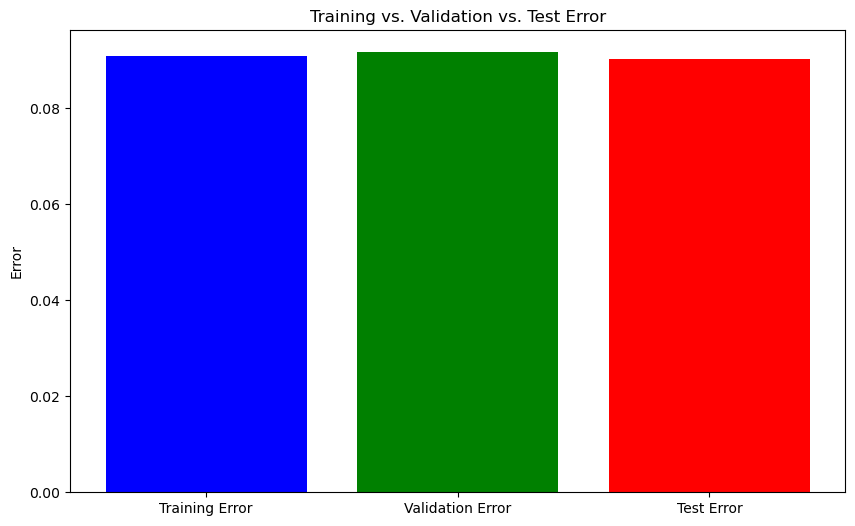

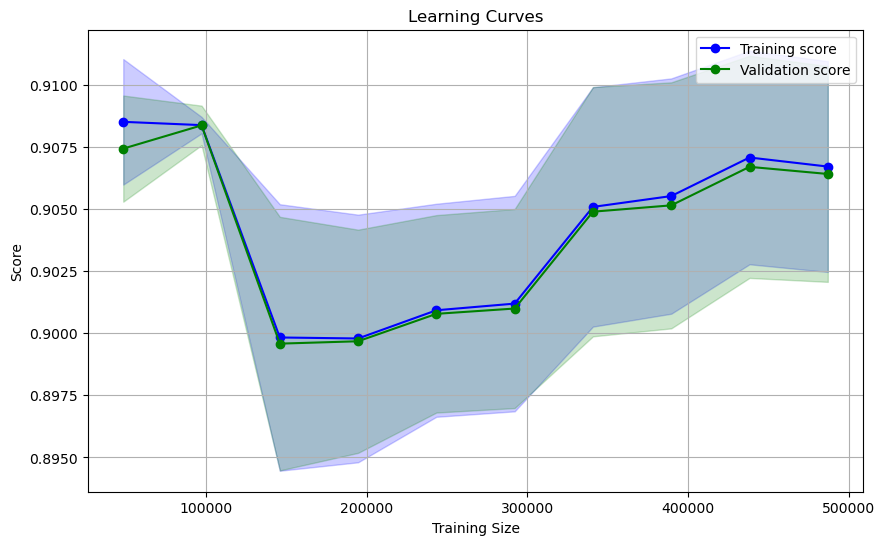

In [12]:
#navie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming 'data' is your DataFrame
X = data.drop(['total_amount', 'total_amount_category'], axis=1)
y = data['total_amount_category']

# Step 1: Split the data into 60% training and 40% temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 2: Split the temporary set into 50% validation and 50% test sets (which is 20% of the original data each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features for training, validation, and test sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifier
clf = GaussianNB()

# Fit the classifier on the training data
clf.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = clf.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = 1 - train_accuracy

# Make predictions on the validation set
y_val_pred = clf.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_error = 1 - val_accuracy

print(f'Training Error: {train_error}')
print(f'Validation Error: {val_error}')

# Make predictions on the test set
y_test_pred = clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = 1 - test_accuracy

print(f'Test Error: {test_error}')

# Plot the training and validation errors
plt.figure(figsize=(10, 6))
errors = {'Training Error': train_error, 'Validation Error': val_error, 'Test Error': test_error}
plt.bar(errors.keys(), errors.values(), color=['blue', 'green', 'red'])
plt.ylabel('Error')
plt.title('Training vs. Validation vs. Test Error')
plt.show()
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curves(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='green', alpha=0.2)
    plt.title('Learning Curves')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Plot learning curves for the Naive Bayes model

plot_learning_curves(clf, X_train_scaled, y_train)
